In [697]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import time
from config import api_key
import pprint as pp
from collections import Counter
%matplotlib inline

In [698]:
base_url = 'https://api.themoviedb.org/3/discover/movie?api_key='

In [738]:
#url string to pass to requests
url = f"{base_url}{api_key}"

#1# parameters (queries) to pass to API Call
language = 'en-US'
region = 'US'
sort_by = 'revenue.desc'
primary_release_year = None
_pages = 50
_start_index = 150
_release_date = '1989-01-01'

#function to make a single API call for page 'p'
def make_request(p):
    
    payload = {'language': language,
               'region': region,
               'sort_by': sort_by,
               'primary_release_year': primary_release_year,
               'primary_release_date.gte': _release_date,
               'page': _start_index + p
          }
    
    r = requests.get(url, params=payload)
    
    return r.json()

In [739]:
#2# function to make 'n' api calls
def make_api_calls(n):
    
    results = []
    
    for i in range(1, n+1):
        
        results.append(make_request(i))
        time.sleep(0.1)
        
    return results

x = make_api_calls(_pages)

In [741]:
#3# function to add all movie ids from your disover query to a list
def extract_ids(data):
    
    list_ids = []
    
    for page in data:
        
        for result in page['results']:
            list_ids.append(result['id'])

    return list_ids

list_ids = extract_ids(x)

In [742]:
#4# function to query single film using list of ids
query_url = 'https://api.themoviedb.org/3/movie/'

def query_movie(list_ids):
    
    results = []
    
    payload = {}
    
    for id in list_ids:
        
        r = requests.get(f'{query_url}{id}?api_key={api_key}', params=payload)
        results.append(r.json())
        time.sleep(0.1)
    
    return results

_results_4 = query_movie(list_ids)

In [719]:
len(_results)

1000

In [704]:
_results[0].keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [721]:
#Create DataFrame
#df_new = pd.DataFrame.from_dict(_results)
df_new.shape
df_new.head(10)

(1000, 25)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,...,2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.4,18071
1,False,/njv65RTipNSTozFLuF85jL0bcQe.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,...,2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.4,12283
2,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://marvel.com/movies/movie/223/avengers_in...,299536,tt4154756,en,Avengers: Infinity War,...,2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An entire universe. Once and for all.,Avengers: Infinity War,False,8.3,12316
3,False,/vFUI5obFtx4IdhP6k8Om5ezHTrk.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",None,597,tt0120338,en,Titanic,...,1997-11-18,1845034188,194,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.8,13645
4,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,...,2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,Jurassic World,False,6.6,13645
5,False,/hbn46fQaRmlpBuUrEiFqv0GDL6Y.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,...,2012-04-25,1519557910,143,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Some assembly required.,The Avengers,False,7.6,18576
6,False,/ypyeMfKydpyuuTMdp36rMlkGDUL.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.furious7.com/,168259,tt2820852,en,Furious 7,...,2015-04-01,1506249360,137,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,False,7.3,6317
7,False,/rFtsE7Lhlc2jRWF7SRAU0fvrveQ.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,...,2015-04-22,1405403694,141,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,12535
8,False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,"{'id': 529892, 'name': 'Black Panther Collecti...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://marvel.com/movies/movie/224/black_panther,284054,tt1825683,en,Black Panther,...,2018-02-13,1346739107,134,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Long live the king.,Black Panther,False,7.4,11347
9,False,/n5A7brJCjejceZmHyujwUTVgQNC.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://hpwishlist.warnerbros.com/,12445,tt1201607,en,Harry Potter and the Deathly Hallows: Part 2,...,2011-07-07,1342000000,130,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It all ends here.,Harry Potter and the Deathly Hallows: Part 2,False,8.1,11060


In [726]:
df_new_2 = pd.DataFrame.from_dict(_results_2)
df_new_2.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/ncF0ozvDnIVFzKF0J5iqwEIezRJ.jpg,None,115000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",None,1535,tt0266987,en,Spy Game,...,2001-11-18,143049560,126,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,It's not how you play the game. It's how the g...,Spy Game,False,6.9,963
1,False,/14Y8zA34cD4gFaEujY0qGHPO4T7.jpg,None,90000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",https://www.uphe.com/movies/meet-joe-black,297,tt0119643,en,Meet Joe Black,...,1998-11-12,142940100,178,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,Sooner or later everyone does.,Meet Joe Black,False,7.1,2105
2,False,/6ECnUXleS9G2O02f1b5tvZiVn3D.jpg,None,50000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://crazystupidlove.warnerbros.com/index.html,50646,tt1570728,en,"Crazy, Stupid, Love.",...,2011-07-29,142851197,118,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This is crazy. This is stupid. This is love.,"Crazy, Stupid, Love.",False,7.2,4395
3,False,/qDaIOqnC5pQyknm7SLnxlffklVy.jpg,"{'id': 41437, 'name': 'Paranormal Activity Col...",5000000,"[{'id': 27, 'name': 'Horror'}]",None,82990,tt2109184,en,Paranormal Activity 4,...,2012-10-17,142817992,95,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's closer than you think,Paranormal Activity 4,False,5.3,981
4,False,/iRD5SBgro8MRmcU9Y4JNJxYmh3k.jpg,"{'id': 1657, 'name': 'Zorro Collection', 'post...",75000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/homevideo/thelegen...,1656,tt0386140,en,The Legend of Zorro,...,2005-10-24,142400065,129,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,The original caped crusader is back!,The Legend of Zorro,False,6.0,1520


In [734]:
df_new_3 = pd.DataFrame.from_dict(_results_3)
df_new_3.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/gkkBhctHPGg8hrmtWbO3ySZoj4z.jpg,None,30000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.1517toparis.com/,453201,tt6802308,en,The 15:17 to Paris,...,2018-02-02,56150957,94,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In the face of fear ordinary people can do the...,The 15:17 to Paris,False,5.3,727
1,False,/iWrg4in89n2gVKoLmNwtDu4tyPU.jpg,None,8520000,"[{'id': 28, 'name': 'Action'}]",None,434119,tt5606538,ko,공조,...,2017-01-18,56100000,125,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Confidential Assignment,False,6.7,29
2,False,/n5VN1CLT0FaDskWfhwaVLIBedqq.jpg,None,45000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",None,9981,tt0384642,en,Kicking & Screaming,...,2005-05-13,56070433,95,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One man could lead this team to glory... That ...,Kicking & Screaming,False,5.6,273
3,False,/kbxk09QgBJfJjnp66ey3JCEshKf.jpg,None,16000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://rememberme-movie.com/,23169,tt1403981,en,Remember Me,...,2010-03-12,56032889,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Live in the moments.,Remember Me,False,7.0,1964
4,False,/8PV8cLmcANo5Jx4EBipD60kET8X.jpg,None,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",None,8814,tt0419706,en,Doom,...,2005-10-20,55987321,105,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,No one gets out alive.,Doom,False,5.0,1008


In [727]:
df_all = pd.concat([df_new, df_new_2], ignore_index=True)

In [735]:
df_all_2 = pd.concat([df_all, df_new_3], ignore_index=True)

In [736]:
len(df_all_2)

3000

In [743]:
df_new_4 = pd.DataFrame.from_dict(_results_4)
df_new_4.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/dompWVgGL1qZ84BkQMlxGwOhKb8.jpg,None,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.miramax.com/movie/emma/,3573,tt0116191,en,Emma,...,1996-08-02,22231658,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Cupid is armed and dangerous!,Emma,False,6.8,296
1,False,/bjMFRzGa8YwfRybKYxHz3arBo80.jpg,None,20000000,"[{'id': 18, 'name': 'Drama'}]",http://www.sonypictures.com/movies/reignoverme...,2355,tt0490204,en,Reign Over Me,...,2007-03-23,22222308,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let in the unexpected.,Reign Over Me,False,7.1,531
2,False,/xke1TAen3XVhmeEOPJtCWEjpDI5.jpg,None,20000000,"[{'id': 27, 'name': 'Horror'}]",http://www.deadsilencemovie.net/,14001,tt0455760,en,Dead Silence,...,2007-03-16,22217407,89,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You scream. You die.,Dead Silence,False,6.3,939
3,False,/l8mwUH3cMGJzQ3eemUwK6bQEnms.jpg,None,2000000,[],http://www.nasharussia-kino.ru/,31059,tt1569465,ru,Наша Russia: Яйца судьбы,...,2010-01-21,22212223,85,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,,Nasha Russia: Yaytsa sudby,False,4.6,23
4,False,/7JbI86bSgpGEyZ3X4BKN9LiY3s5.jpg,None,30000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",None,13460,tt0483607,en,Doomsday,...,2008-03-14,22211426,108,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind has an expiration date.,Doomsday,False,5.8,544


In [744]:
df_all_3 = pd.concat([df_all_2, df_new_4], ignore_index = True)

In [747]:
len(df_all_3)

4000

In [746]:
df_all_3.to_csv('df_all_3.csv')

In [749]:
#Drop Unnecessary Columns
df = df_all_3.drop(columns=['adult', 'backdrop_path', 'original_title', 'belongs_to_collection', 'homepage','poster_path', 'spoken_languages', 'status', 'video'])

In [751]:
#Rearrange the Columns
df = df[['id', 'imdb_id', 'title', 'release_date', 'genres',
         'revenue', 'budget', 'runtime', 'tagline', 'overview', 'production_companies', 'production_countries', 'vote_average', 'vote_count' ]]

In [752]:
#Cast release_date as datetime
df['release_date'] = pd.to_datetime(df['release_date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [773]:
#Make a Copy of the DataFrame to work on
dfx = df.copy(deep=True)
dfx.shape
dfx.head()

(4000, 14)

,id,imdb_id,title,release_date,genres,revenue,budget,runtime,tagline,overview,production_companies,production_countries,vote_average,vote_count
0,19995,tt0499549,Avatar,2009-12-10,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2787965087,237000000,162,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'id': 289, 'logo_path': None, 'name': 'Ingen...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18071
1,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2068223624,245000000,136,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'id': 1634, 'logo_path': None, 'name': 'True...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12283
2,299536,tt4154756,Avengers: Infinity War,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,300000000,149,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12316
3,597,tt0120338,Titanic,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1845034188,200000000,194,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13645
4,135397,tt0369610,Jurassic World,2015-06-06,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1671713208,150000000,124,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'id': 3341, 'logo_path': '/dTG5dXE1kU2mpmL9B...","[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13645


In [775]:
list_of_lists = []

for i in range(len(dfx)):
    list_cos = []
    for j in dfx.iloc[i]['production_companies']:
        list_cos.append(j['name'])
    list_of_lists.append(list_cos)
    
dfx['all_companies'] = list_of_lists

In [778]:
#Maks CSV File from Dataframe (from API Call)
dfx.to_csv('dfx_movies.csv')

In [6]:
from bs4 import BeautifulSoup

def build_url(page):
    host = 'https://www.the-numbers.com/movie/budgets/all/'
    return f"{host}{page}"

def scrape(page):
    #calls url function and parses results into Beautiful Soup
    r = requests.get(build_url(page))
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    return soup


In [7]:

def parse_scrape(soup_object):

    table = soup_object.find( "table")
    movie_data = table.find_all('td', class_ = 'data')

    titles = []
    movie_list = []
    
    for i in table.find_all('b'):
        titles.append(i.get_text())

    i = 0
    for row in range(int(len(movie_data)/4)):
        movie_list.append({'name': titles[row], 'budget': movie_data[row+i+1].get_text(), 'dom_gross': movie_data[row+i+2].get_text(), 'ww_gross': movie_data[row+i+3].get_text()})
        i += 3
        
    return movie_list

def loop_through(loops):
    
    movie_list = []
    
    adder = 100
    page = 1
    
    for i in range(loops):
        output = parse_scrape(scrape(page))
        for j in range(len(output)):
            movie_list.append(output[j])
        page += adder
        
    return movie_list

movie = loop_through(20)

In [63]:
from pandas.io.json import json_normalize
data = movie
movie_nums = json_normalize(data)
movie_nums.head()

,budget,dom_gross,name,ww_gross
0,"$425,000,000","$760,507,625",Avatar,"$2,776,345,279"
1,"$410,600,000","$241,063,875",Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,"$330,600,000","$459,005,868",Avengers: Age of Ultron,"$1,403,013,963"
3,"$317,000,000","$620,181,382",Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
4,"$306,000,000","$936,662,225",Star Wars Ep. VII: The Force Awakens,"$2,053,311,220"


In [64]:
movie_nums = movie_nums[['name', 'budget', 'dom_gross', 'ww_gross']]
movie_nums.head()

,name,budget,dom_gross,ww_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
3,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
4,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"


In [66]:
cols = ['budget', 'dom_gross', 'ww_gross']

movie_nums['budget'] = movie_nums['budget'].str.strip('$').str.replace(',','')
movie_nums['dom_gross'] = movie_nums['dom_gross'].str.strip('$').str.replace(',','')
movie_nums['ww_gross'] = movie_nums['ww_gross'].str.strip('$').str.replace(',','')

movie_nums[cols] = movie_nums[cols].applymap(np.int64)

movie_nums.head()

,name,budget,dom_gross,ww_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Avengers: Age of Ultron,330600000,459005868,1403013963
3,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
4,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220


In [67]:
movie_nums[cols] = movie_nums[cols].replace(0, np.nan)

In [69]:
movie_nums.dropna(subset = cols, inplace=True)
movie_nums.shape

(1970, 4)

In [381]:
movie_nums['multiple'] = movie_nums['ww_gross'] / movie_nums['budget']
movie_nums.head(20)

,name,budget,dom_gross,ww_gross,multiple
0,Avatar,425000000,760507625.0,2.776345e+09,6.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,2.546673
2,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,4.243841
3,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,4.153696
4,Star Wars Ep. VII: The Force Awakens,306000000,936662225.0,2.053311e+09,6.710167
5,Avengers: Infinity War,300000000,678815482.0,2.048798e+09,6.829326
6,Pirates of the Caribbean: At Worldâs End,300000000,309420425.0,9.634204e+08,3.211401
7,Justice League,300000000,229024295.0,6.559452e+08,2.186484
8,Spectre,300000000,200074175.0,8.796209e+08,2.932070
9,The Dark Knight Rises,275000000,448139099.0,1.084439e+09,3.943415


In [527]:
"""Import dfx.csv file created earlier in Notebook"""
dfx = pd.read_csv('dfx_movies.csv')
dfx

'Import dfx.csv file created earlier in Notebook'

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres
0,0,19995.0,tt0499549,Avatar,Avatar,2009-12-10,2.787965e+09,237000000.0,162.0,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18058.0,"['Ingenious Film Partners', 'Dune Entertainmen...","['Action', 'Adventure', 'Fantasy', 'Science Fi..."
1,1,140607.0,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,2.068224e+09,245000000.0,136.0,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12278.0,"['Truenorth Productions', 'Lucasfilm', 'Bad Ro...","['Action', 'Adventure', 'Science Fiction', 'Fa..."
2,2,299536.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,2.046240e+09,300000000.0,149.0,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12288.0,['Marvel Studios'],"['Adventure', 'Action', 'Fantasy']"
3,3,597.0,tt0120338,Titanic,Titanic,1997-11-18,1.845034e+09,200000000.0,194.0,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13630.0,"['Paramount', 'Lightstorm Entertainment', '20t...","['Drama', 'Romance', 'Thriller']"
4,4,570421.0,NaN,Star Wars: The Original Trilogy,Star Wars: The Original Trilogy,NaN,1.788879e+09,61.0,377.0,NaN,"Years later, the original Star Wars trilogy is...",[],8.5,1.0,[],[]
5,5,135397.0,tt0369610,Jurassic World,Jurassic World,2015-06-06,1.671713e+09,150000000.0,124.0,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13638.0,"['Fuji Television Network', 'Amblin Entertainm...","['Action', 'Adventure', 'Science Fiction', 'Th..."
6,6,24428.0,tt0848228,The Avengers,The Avengers,2012-04-25,1.519558e+09,220000000.0,143.0,Some assembly required.,When an unexpected enemy emerges and threatens...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.6,18555.0,['Marvel Studios'],"['Science Fiction', 'Action', 'Adventure']"
7,7,168259.0,tt2820852,Furious 7,Furious 7,2015-04-01,1.506249e+09,190000000.0,137.0,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,6314.0,"['Abu Dhabi Film Commission', 'Universal Pictu...","['Action', 'Crime', 'Thriller', 'Drama']"
8,8,99861.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015-04-22,1.405404e+09,280000000.0,141.0,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,12517.0,['Marvel Studios'],"['Action', 'Adventure', 'Science Fiction']"
9,9,284054.0,tt1825683,Black Panther,Black Panther,2018-02-13,1.346739e+09,200000000.0,134.0,Long live the king.,King T'Challa returns home from America to the...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,11320.0,"['Marvel Studios', 'Walt Disney Pictures']","['Action', 'Adventure', 'Fantasy', 'Science Fi..."


In [528]:
dfx.shape

(1990, 16)

In [558]:
#Replace '0' Values in Revenue & Budget with nan
dfx_cols = ['revenue', 'budget']
dfx[dfx_cols] = dfx[dfx_cols].replace(0, np.nan)

In [561]:
#Drop rows with nan Values in Revenue & Budget
dfx.dropna(subset = dfx_cols, inplace=True)
dfx.shape

(1898, 20)

In [562]:
#Clean up Genres
dfx['list_genres'] = dfx['list_genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['list_genres'] = dfx['list_genres'].str.split(',')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [563]:
list_all_genres = []

for row in dfx['list_genres']:
    for genre in row:
        list_all_genres.append(genre)
        
list_all_genres[:10]


['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Action',
 'Adventure',
 'ScienceFiction',
 'Fantasy',
 'Adventure',
 'Action']

In [564]:
#Count & Sort Genres
genre_appearances = Counter(list_all_genres)
sorted_appearances = sorted(zip(genre_appearances.values(), genre_appearances.keys()), reverse=True)


In [565]:
sorted_appearances[:10]

[(700, 'Comedy'),
 (690, 'Action'),
 (686, 'Drama'),
 (571, 'Adventure'),
 (548, 'Thriller'),
 (343, 'Family'),
 (315, 'Fantasy'),
 (306, 'ScienceFiction'),
 (296, 'Romance'),
 (266, 'Crime')]

In [566]:
#Clean up Production Cos
dfx['all_production_cos'] = dfx['all_production_cos'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dfx['all_production_cos'] = dfx['all_production_cos'].str.split(',')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [567]:
all_cos = []

for row in dfx['all_production_cos']:
    for co in row:
        all_cos.append(co)
        
all_cos

['IngeniousFilmPartners',
 'DuneEntertainment',
 'LightstormEntertainment',
 '20thCenturyFox',
 'TruenorthProductions',
 'Lucasfilm',
 'BadRobot',
 'MarvelStudios',
 'Paramount',
 'LightstormEntertainment',
 '20thCenturyFox',
 'FujiTelevisionNetwork',
 'AmblinEntertainment',
 'LegendaryEntertainment',
 'UniversalPictures',
 'Dentsu',
 'TheKennedy/MarshallCompany',
 'MarvelStudios',
 'AbuDhabiFilmCommission',
 'UniversalPictures',
 'ChinaFilmCo.',
 'OriginalFilm',
 'FujiTelevisionNetwork',
 'QuébecProductionServicesTaxCredit',
 'ColoradoOfficeofFilm',
 'Television&Media',
 'Dentsu',
 'MediaRightsCapital',
 'OneRace',
 'MarvelStudios',
 'MarvelStudios',
 'WaltDisneyPictures',
 'WarnerBros.Pictures',
 'HeydayFilms',
 'Lucasfilm',
 'WaltDisneyPictures',
 'RamBergmanProductions',
 'FormulaFilm',
 'TruenorthProductions',
 'JucumariFilms',
 'AmblinEntertainment',
 'LegendaryEntertainment',
 'UniversalPictures',
 'PerfectWorldPictures',
 'WaltDisneyPictures',
 'WaltDisneyAnimationStudios',
 'W

In [630]:
#Count & Sort Production Companies
prod_appearances = Counter(all_cos)
prod_sorted = sorted(zip(prod_appearances.values(), prod_appearances.keys()), reverse=True)
prod_sorted[:10]

[(226, 'WarnerBros.Pictures'),
 (221, 'UniversalPictures'),
 (183, 'ColumbiaPictures'),
 (174, 'Paramount'),
 (170, '20thCenturyFox'),
 (108, 'WaltDisneyPictures'),
 (90, 'NewLineCinema'),
 (74, 'DreamWorks'),
 (68, 'RelativityMedia'),
 (66, 'VillageRoadshowPictures')]

In [569]:
#Convert Release Dates to datetime and Make Release Year column
dfx.release_date = pd.to_datetime(dfx['release_date'])
dfx['release_year'] = dfx['release_date'].dt.year
dfx.head()

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres,release_year,Lionsgate,multiple,disney
0,0,19995.0,tt0499549,Avatar,Avatar,2009-12-10,2.787965e+09,237000000.0,162.0,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18058.0,"[IngeniousFilmPartners, DuneEntertainment, Lig...","[Action, Adventure, Fantasy, ScienceFiction]",2009,False,11.763566,False
1,1,140607.0,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,2.068224e+09,245000000.0,136.0,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12278.0,"[TruenorthProductions, Lucasfilm, BadRobot]","[Action, Adventure, ScienceFiction, Fantasy]",2015,False,8.441729,False
2,2,299536.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,2.046240e+09,300000000.0,149.0,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12288.0,[MarvelStudios],"[Adventure, Action, Fantasy]",2018,False,6.820799,False
3,3,597.0,tt0120338,Titanic,Titanic,1997-11-18,1.845034e+09,200000000.0,194.0,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13630.0,"[Paramount, LightstormEntertainment, 20thCentu...","[Drama, Romance, Thriller]",1997,False,9.225171,False
5,5,135397.0,tt0369610,Jurassic World,Jurassic World,2015-06-06,1.671713e+09,150000000.0,124.0,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13638.0,"[FujiTelevisionNetwork, AmblinEntertainment, L...","[Action, Adventure, ScienceFiction, Thriller]",2015,False,11.144755,False


In [546]:
dfx['multiple'] = dfx['revenue'] / dfx['budget']
dfx.sort_values('multiple', ascending=False).head(10)

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres,release_year,Lionsgate,multiple
769,769,23827.0,tt1179904,Paranormal Activity,Paranormal Activity,2009-09-25,193355800.0,15000.0,86.0,What Happens When You Sleep?,"After a young, middle class couple moves into ...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.9,2613.0,"[BlumhouseProductions, SolanaFilms]","[Horror, Mystery]",2009.0,False,12890.386667
1514,1514,491562.0,NaN,Derakoola,دراکولا,2016-09-26,100000000.0,15000.0,NaN,NaN,An addict is captured by a Dracula. Dracula's ...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,0.0,[IranianIndependents],"[Drama, Comedy]",2016.0,False,6666.666667
744,744,513434.0,tt7914416,One Cut of the Dead,カメラを止めるな！,2017-11-04,200000000.0,30000.0,96.0,Don't Stop Shooting!,Things go badly for a hack director and film c...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",8.4,47.0,"[Panpokopina, ENBUSeminar]","[Comedy, Horror, Drama]",2017.0,False,6666.666667
1512,1512,506972.0,NaN,Khaltoor,Khaltoor,2018-02-22,100000000.0,15000.0,90.0,Khaltoor,The lives of three young musicians who are try...,[],0.0,0.0,[Pooyafilm],"[Comedy, Crime]",2018.0,False,6666.666667
577,577,2667.0,tt0185937,The Blair Witch Project,The Blair Witch Project,1999-07-14,248000000.0,60000.0,81.0,The scariest movie of all time is a true story.,In October of 1994 three student filmmakers di...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.3,2077.0,"[HaxanFilms, ArtisanEntertainment]","[Horror, Mystery]",1999.0,False,4133.333333
1513,1513,506664.0,tt3718222,Yeki Mikhad Bahat Harf Bezane,Yeki Mikhad Bahat Harf Bezane,2012-09-22,100000000.0,100000.0,90.0,Yeki Mikhad Bahat Harf Bezane,Yasaman has been living with her mother Leila ...,[],0.0,0.0,[IranianIndependents],"[Drama, Family]",2012.0,False,1000.000000
1718,1718,9462.0,tt0068935,The Way of the Dragon,猛龍過江,1972-06-01,85000000.0,130000.0,100.0,The Colosseum . . the battleground of Bruce Le...,Tang Lung arrives in Rome to help his cousins ...,"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",7.5,405.0,"[OrangeSkyGoldenHarvest, ConcordProductionsInc.]","[Action, Crime]",1972.0,False,653.846154
528,528,3170.0,tt0034492,Bambi,Bambi,1942-08-14,267447150.0,858000.0,70.0,A great love story.,Bambi's tale unfolds from season to season as ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.9,2814.0,[WaltDisneyProductions],"[Animation, Drama, Family]",1942.0,False,311.709965
1506,1506,9659.0,tt0079501,Mad Max,Mad Max,1979-04-12,100000000.0,400000.0,91.0,The Maximum Force Of The Future,"In a self-destructing world, a vengeful Austra...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",6.7,1972.0,"[KennedyMillerProductions, Crossroads, MadMaxF...","[Adventure, Action, Thriller, ScienceFiction]",1979.0,False,250.000000
32,32,12092.0,tt0043274,Alice in Wonderland,Alice in Wonderland,1951-07-03,572000000.0,3000000.0,75.0,A world of wonders in One Great Picture,"On a golden afternoon, young Alice follows a W...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.1,3082.0,[WaltDisneyCompany],"[Animation, Family, Fantasy, Music, Adventure]",1951.0,False,190.666667


In [570]:
#Drop Karate Kid (Budget Outlier)
dfx.drop(dfx.loc[dfx['id'] == 8856.0].index, inplace=True)
#Drop Star Wars Trilogy
dfx.drop(dfx.loc[dfx['id'] == 570421.0].index, inplace=True)

In [571]:
#Drop Two Columns
dfx.drop(columns=['Unnamed: 0', 'original_title'])

,id,imdb_id,title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres,release_year,Lionsgate,multiple,disney
0,19995.0,tt0499549,Avatar,2009-12-10,2.787965e+09,237000000.0,162.0,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18058.0,"[IngeniousFilmPartners, DuneEntertainment, Lig...","[Action, Adventure, Fantasy, ScienceFiction]",2009,False,11.763566,False
1,140607.0,tt2488496,Star Wars: The Force Awakens,2015-12-15,2.068224e+09,245000000.0,136.0,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12278.0,"[TruenorthProductions, Lucasfilm, BadRobot]","[Action, Adventure, ScienceFiction, Fantasy]",2015,False,8.441729,False
2,299536.0,tt4154756,Avengers: Infinity War,2018-04-25,2.046240e+09,300000000.0,149.0,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12288.0,[MarvelStudios],"[Adventure, Action, Fantasy]",2018,False,6.820799,False
3,597.0,tt0120338,Titanic,1997-11-18,1.845034e+09,200000000.0,194.0,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13630.0,"[Paramount, LightstormEntertainment, 20thCentu...","[Drama, Romance, Thriller]",1997,False,9.225171,False
5,135397.0,tt0369610,Jurassic World,2015-06-06,1.671713e+09,150000000.0,124.0,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13638.0,"[FujiTelevisionNetwork, AmblinEntertainment, L...","[Action, Adventure, ScienceFiction, Thriller]",2015,False,11.144755,False
6,24428.0,tt0848228,The Avengers,2012-04-25,1.519558e+09,220000000.0,143.0,Some assembly required.,When an unexpected enemy emerges and threatens...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.6,18555.0,[MarvelStudios],"[ScienceFiction, Action, Adventure]",2012,False,6.907081,False
7,168259.0,tt2820852,Furious 7,2015-04-01,1.506249e+09,190000000.0,137.0,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,6314.0,"[AbuDhabiFilmCommission, UniversalPictures, Ch...","[Action, Crime, Thriller, Drama]",2015,False,7.927628,False
8,99861.0,tt2395427,Avengers: Age of Ultron,2015-04-22,1.405404e+09,280000000.0,141.0,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.3,12517.0,[MarvelStudios],"[Action, Adventure, ScienceFiction]",2015,False,5.019299,False
9,284054.0,tt1825683,Black Panther,2018-02-13,1.346739e+09,200000000.0,134.0,Long live the king.,King T'Challa returns home from America to the...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,11320.0,"[MarvelStudios, WaltDisneyPictures]","[Action, Adventure, Fantasy, ScienceFiction]",2018,False,6.733696,True
10,12445.0,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1.342000e+09,125000000.0,130.0,It all ends here.,"Harry, Ron and Hermione continue their quest t...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",8.1,11046.0,"[WarnerBros.Pictures, HeydayFilms]","[Family, Fantasy, Adventure]",2011,False,10.736000,False


In [549]:
#Make List of Movies Lionsgate was listed as one of Productino Companies
list_lion = []

for i in range(len(dfx)):
    for item in dfx.iloc[i]['all_production_cos']:
        if 'lion' in item.lower():
            list_lion.append(dfx.iloc[i]['title'])
            #print(dfx.iloc[i]['all_production_cos'], '-->', dfx.iloc[i]['title'])
len(list_lion)

39

In [ ]:
#df['is_it_whole'] = df['value'].apply(lambda x: x.is_integer())

In [550]:
#Create Column if Lionsgate Production Co
def by_lionsgate(row):
    if row['title'] in list_lion:
        val = True
    else:
        val = False
    
    return val

dfx['Lionsgate'] = dfx.apply(by_lionsgate, axis=1)

In [551]:
#All Lionsgate
dfx[dfx['Lionsgate'] == True][:10]

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres,release_year,Lionsgate,multiple
71,71,101299.0,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013-11-15,847423452.0,130000000.0,146.0,Every revolution begins with a spark.,Katniss Everdeen has returned home safe after ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,10787.0,"[Lionsgate, ColorForce]","[Adventure, Action, ScienceFiction]",2013.0,True,6.518642
97,97,131631.0,tt1951265,The Hunger Games: Mockingjay - Part 1,The Hunger Games: Mockingjay - Part 1,2014-11-18,752100229.0,125000000.0,123.0,Fire burns brighter in the darkness,Katniss Everdeen reluctantly becomes the symbo...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.8,9751.0,"[Lionsgate, ColorForce]","[ScienceFiction, Adventure, Thriller]",2014.0,True,6.016802
117,117,70160.0,tt1392170,The Hunger Games,The Hunger Games,2012-03-12,691210692.0,75000000.0,142.0,May The Odds Be Ever In Your Favor.,Every year in the ruins of what was once North...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.1,14138.0,"[Lionsgate, ColorForce]","[ScienceFiction, Adventure, Fantasy]",2012.0,True,9.216143
129,129,131634.0,tt1951266,The Hunger Games: Mockingjay - Part 2,The Hunger Games: Mockingjay - Part 2,2015-11-18,653428261.0,160000000.0,137.0,The fire will burn forever.,"With the nation of Panem in a full scale war, ...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",6.8,7328.0,"[StudioBabelsberg, Lionsgate, ColorForce]","[Action, Adventure, ScienceFiction]",2015.0,True,4.083927
175,175,435.0,tt0319262,The Day After Tomorrow,The Day After Tomorrow,2004-05-26,544272402.0,125000000.0,124.0,Where will you be?,After years of increases in the greenhouse eff...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.4,4172.0,"[""MelsCiteduCinema"", LionsGateFilms, Centropol...","[Action, Adventure, ScienceFiction, Thriller]",2004.0,True,4.354179
386,386,291805.0,tt3110958,Now You See Me 2,Now You See Me 2,2016-06-02,334901337.0,90000000.0,129.0,You Haven't Seen Anything Yet,One year after outwitting the FBI and winning ...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",6.8,6455.0,"[SummitEntertainment, Lionsgate, K/OPaperProdu...","[Action, Comedy, Thriller]",2016.0,True,3.721126
468,468,262500.0,tt2908446,Insurgent,Insurgent,2015-03-18,295238201.0,110000000.0,119.0,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.3,6548.0,"[SummitEntertainment, RedWagonEntertainment, M...","[Action, Adventure, ScienceFiction, Thriller]",2015.0,True,2.683984
718,718,138103.0,tt2333784,The Expendables 3,The Expendables 3,2014-08-04,206172544.0,90000000.0,127.0,New team. New attitude. New mission.,"Barney, Christmas and the rest of the team com...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",6.1,2775.0,"[Davis-Films, NuImage, Ex3Productions, FipexHo...","[Action, Adventure, Thriller]",2014.0,True,2.290806
838,838,262504.0,tt3410834,Allegiant,Allegiant,2016-03-09,179246868.0,110000000.0,121.0,Break the boundaries of your world,Beatrice Prior and Tobias Eaton venture into t...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5.9,3953.0,"[MandevilleFilms, SummitEntertainment, Lionsga...","[Adventure, ScienceFiction, Action, Mystery]",2016.0,True,1.629517
891,891,324552.0,tt4425200,John Wick: Chapter 2,John Wick: Chapter 2,2017-02-08,171539887.0,40000000.0,122.0,Never stab the devil in the back,John Wick is forced out of retirement by a for...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.9,5308.0,"[ThunderRoadPictures, 87Eleven, Lionsgate]","[Thriller, Action, Crime]",2017.0,True,4.288497


In [552]:
#Comparing Lionsgate Multiple ("True") versus Dataset (Full Dataset is top ~2000 revenue producing films of all time)
dfx.groupby('Lionsgate')['multiple'].describe()

,count,mean,std,min,25%,50%,75%,max
Lionsgate,,,,,,,,
False,1859.0,27.819537,413.109014,0.350157,2.350233,3.670761,6.567695,12890.386667
True,39.0,8.388801,14.680865,0.675028,2.063911,3.741367,7.966518,86.593058


In [609]:
prod_var = 'disney'

prod_list = []

for i in range(len(dfx)):
    for item in dfx.iloc[i]['all_production_cos']:
        if prod_var in item.lower():
            prod_list.append(dfx.iloc[i]['title'])
            #print(dfx.iloc[i]['all_production_cos'], '-->', dfx.iloc[i]['title'])

#Create Column if Warner
def prod_check(row):
    if row['title'] in prod_list:
        val = True
    else:
        val = False
    
    return val

dfx[prod_var] = dfx.apply(prod_check, axis=1)

In [612]:
dfx.groupby('production_companies')['revenue'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
production_companies,,,,,,,,
"['IngeniousFilmPartners', 'DuneEntertainment', 'LightstormEntertainment', '20thCenturyFox']",1.0,2.787965e+09,NaN,2.787965e+09,2.787965e+09,2.787965e+09,2.787965e+09,2.787965e+09
"['TruenorthProductions', 'Lucasfilm', 'BadRobot']",1.0,2.068224e+09,NaN,2.068224e+09,2.068224e+09,2.068224e+09,2.068224e+09,2.068224e+09
"['Paramount', 'LightstormEntertainment', '20thCenturyFox']",1.0,1.845034e+09,NaN,1.845034e+09,1.845034e+09,1.845034e+09,1.845034e+09,1.845034e+09
"['FujiTelevisionNetwork', 'AmblinEntertainment', 'LegendaryEntertainment', 'UniversalPictures', 'Dentsu', 'TheKennedy/MarshallCompany']",1.0,1.671713e+09,NaN,1.671713e+09,1.671713e+09,1.671713e+09,1.671713e+09,1.671713e+09
"['AbuDhabiFilmCommission', 'UniversalPictures', 'ChinaFilmCo.', 'OriginalFilm', 'FujiTelevisionNetwork', 'QuébecProductionServicesTaxCredit', 'ColoradoOfficeofFilm', 'Television&Media', 'Dentsu', 'MediaRightsCapital', 'OneRace']",1.0,1.506249e+09,NaN,1.506249e+09,1.506249e+09,1.506249e+09,1.506249e+09,1.506249e+09
"['Lucasfilm', 'WaltDisneyPictures', 'RamBergmanProductions', 'FormulaFilm', 'TruenorthProductions', 'JucumariFilms']",1.0,1.332460e+09,NaN,1.332460e+09,1.332460e+09,1.332460e+09,1.332460e+09,1.332460e+09
"['AmblinEntertainment', 'LegendaryEntertainment', 'UniversalPictures', 'PerfectWorldPictures']",1.0,1.303460e+09,NaN,1.303460e+09,1.303460e+09,1.303460e+09,1.303460e+09,1.303460e+09
"['WaltDisneyPictures', 'Pixar']",1.0,1.241891e+09,NaN,1.241891e+09,1.241891e+09,1.241891e+09,1.241891e+09,1.241891e+09
"['UniversalPictures', 'OriginalFilm', 'FujiEightCompanyLtd.', 'ChinaFilmCo.', 'Dentsu', 'OneRace']",1.0,1.238765e+09,NaN,1.238765e+09,1.238765e+09,1.238765e+09,1.238765e+09,1.238765e+09


In [457]:
dfx.sort_values('multiple', ascending=False)

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,...,all_production_cos,list_genres,release_year,multiple,Lionsgate,Warner,fox,marvel,paramount,disney
769,769,23827.0,tt1179904,Paranormal Activity,Paranormal Activity,2009-09-25,193355800.0,15000.0,86.0,What Happens When You Sleep?,...,"[BlumhouseProductions, SolanaFilms]","[Horror, Mystery]",2009,12890.386667,False,False,False,False,False,False
1514,1514,491562.0,NaN,Derakoola,دراکولا,2016-09-26,100000000.0,15000.0,NaN,NaN,...,[IranianIndependents],"[Drama, Comedy]",2016,6666.666667,False,False,False,False,False,False
744,744,513434.0,tt7914416,One Cut of the Dead,カメラを止めるな！,2017-11-04,200000000.0,30000.0,96.0,Don't Stop Shooting!,...,"[Panpokopina, ENBUSeminar]","[Comedy, Horror, Drama]",2017,6666.666667,False,False,False,False,False,False
1512,1512,506972.0,NaN,Khaltoor,Khaltoor,2018-02-22,100000000.0,15000.0,90.0,Khaltoor,...,[Pooyafilm],"[Comedy, Crime]",2018,6666.666667,False,False,False,False,False,False
577,577,2667.0,tt0185937,The Blair Witch Project,The Blair Witch Project,1999-07-14,248000000.0,60000.0,81.0,The scariest movie of all time is a true story.,...,"[HaxanFilms, ArtisanEntertainment]","[Horror, Mystery]",1999,4133.333333,False,False,False,False,False,False
1513,1513,506664.0,tt3718222,Yeki Mikhad Bahat Harf Bezane,Yeki Mikhad Bahat Harf Bezane,2012-09-22,100000000.0,100000.0,90.0,Yeki Mikhad Bahat Harf Bezane,...,[IranianIndependents],"[Drama, Family]",2012,1000.000000,False,False,False,False,False,False
1718,1718,9462.0,tt0068935,The Way of the Dragon,猛龍過江,1972-06-01,85000000.0,130000.0,100.0,The Colosseum . . the battleground of Bruce Le...,...,"[OrangeSkyGoldenHarvest, ConcordProductionsInc.]","[Action, Crime]",1972,653.846154,False,False,False,False,False,False
528,528,3170.0,tt0034492,Bambi,Bambi,1942-08-14,267447150.0,858000.0,70.0,A great love story.,...,[WaltDisneyProductions],"[Animation, Drama, Family]",1942,311.709965,False,False,False,False,False,True
1506,1506,9659.0,tt0079501,Mad Max,Mad Max,1979-04-12,100000000.0,400000.0,91.0,The Maximum Force Of The Future,...,"[KennedyMillerProductions, Crossroads, MadMaxF...","[Adventure, Action, Thriller, ScienceFiction]",1979,250.000000,False,False,False,False,False,False
32,32,12092.0,tt0043274,Alice in Wonderland,Alice in Wonderland,1951-07-03,572000000.0,3000000.0,75.0,A world of wonders in One Great Picture,...,[WaltDisneyCompany],"[Animation, Family, Fantasy, Music, Adventure]",1951,190.666667,False,False,False,False,False,True


In [611]:
dfx['production_companies'] = dfx['all_production_cos'].astype(str)

In [585]:
dfx['revenue_m'] = dfx['revenue'] / 1000000
dfx['budget_m'] = dfx['budget'] / 1000000

In [586]:
dfx.groupby('release_year')['multiple'].aggregate([min, max, 'mean']).sort_values('release_year', ascending=False)

,min,max,mean
release_year,,,
2019,2.251870,12.188263,5.109318
2018,0.732601,6666.666667,113.064904
2017,0.835286,6666.666667,96.924389
2016,0.940613,6666.666667,73.271067
2015,0.855922,19.690012,4.737469
2014,0.906397,39.545794,5.629205
2013,0.350157,29.776209,4.685315
2012,1.104292,1000.000000,21.500988
2011,1.013951,41.140764,4.761866


In [482]:
dfx.keys()

Index(['Unnamed: 0', 'id', 'imdb_id', 'title', 'original_title',
       'release_date', 'revenue', 'budget', 'runtime', 'tagline', 'overview',
       'production_countries', 'vote_average', 'vote_count',
       'all_production_cos', 'list_genres', 'release_year', 'multiple',
       'Lionsgate', 'Warner', 'fox', 'marvel', 'paramount', 'disney',
       'production_companies', 'revenue_m', 'budget_m'],
      dtype='object')

In [511]:
#dfx['production_countries'] = dfx['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
#dfx['production_countries'] = dfx['production_countries'].str.split(',')

prod_country = 'US'

country_list = []

for i in range(len(dfx)):
    for item in dfx.iloc[i]['production_countries']:
        if prod_country in item:
            country_list.append(dfx.iloc[i]['title'])
            #print(dfx.iloc[i]['production_countries'], '-->', dfx.iloc[i]['title'])

#Create Column if Warner
def country_check(row):
    if row['title'] in country_list:
        val = True
    else:
        val = False
    
    return val

dfx['is_us'] = dfx.apply(country_check, axis=1)

In [513]:
dfx = dfx[dfx['is_us']]

In [584]:
dfx.head()

,Unnamed: 0,id,imdb_id,title,original_title,release_date,revenue,budget,runtime,tagline,overview,production_countries,vote_average,vote_count,all_production_cos,list_genres,release_year,Lionsgate,multiple,disney
0,0,19995.0,tt0499549,Avatar,Avatar,2009-12-10,2.787965e+09,237000000.0,162.0,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,18058.0,"[IngeniousFilmPartners, DuneEntertainment, Lig...","[Action, Adventure, Fantasy, ScienceFiction]",2009,False,11.763566,False
1,1,140607.0,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,2015-12-15,2.068224e+09,245000000.0,136.0,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.4,12278.0,"[TruenorthProductions, Lucasfilm, BadRobot]","[Action, Adventure, ScienceFiction, Fantasy]",2015,False,8.441729,False
2,2,299536.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018-04-25,2.046240e+09,300000000.0,149.0,An entire universe. Once and for all.,As the Avengers and their allies have continue...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8.3,12288.0,[MarvelStudios],"[Adventure, Action, Fantasy]",2018,False,6.820799,False
3,3,597.0,tt0120338,Titanic,Titanic,1997-11-18,1.845034e+09,200000000.0,194.0,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.8,13630.0,"[Paramount, LightstormEntertainment, 20thCentu...","[Drama, Romance, Thriller]",1997,False,9.225171,False
5,5,135397.0,tt0369610,Jurassic World,Jurassic World,2015-06-06,1.671713e+09,150000000.0,124.0,The park is open.,Twenty-two years after the events of Jurassic ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,13638.0,"[FujiTelevisionNetwork, AmblinEntertainment, L...","[Action, Adventure, ScienceFiction, Thriller]",2015,False,11.144755,False


In [515]:
dfx.shape

(1760, 28)

In [525]:
dfx.groupby('production_companies')['multiple'].aggregate([min, max, 'count', 'mean']).sort_values('count', ascending=False)

,min,max,count,mean
production_companies,,,,
['Paramount'],2.109684,62.000000,30,10.084207
['MarvelStudios'],1.091414,6.907081,18,4.391042
['ColumbiaPictures'],0.819755,13.282500,17,3.717070
['UniversalPictures'],1.793196,29.473820,14,9.544009
['DreamWorksAnimation'],2.093116,5.151181,13,3.676233
['WaltDisneyPictures'],0.945013,51.460903,13,12.180846
"['WaltDisneyPictures', 'WaltDisneyAnimationStudios']",1.128887,21.944084,11,4.989146
['Pixar'],1.896721,12.451801,11,5.168114
['20thCenturyFox'],1.364705,16.081941,9,7.232175


In [526]:
dfx.to_csv('dfx_2_movies.csv')

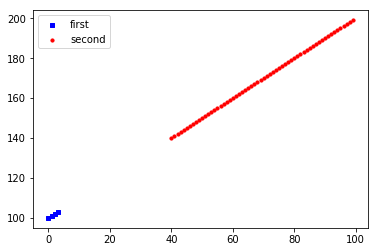

In [622]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

(Text(0.5, 22.200000000000003, 'budget'),
 Text(22.199999999999996, 0.5, 'revenue'))

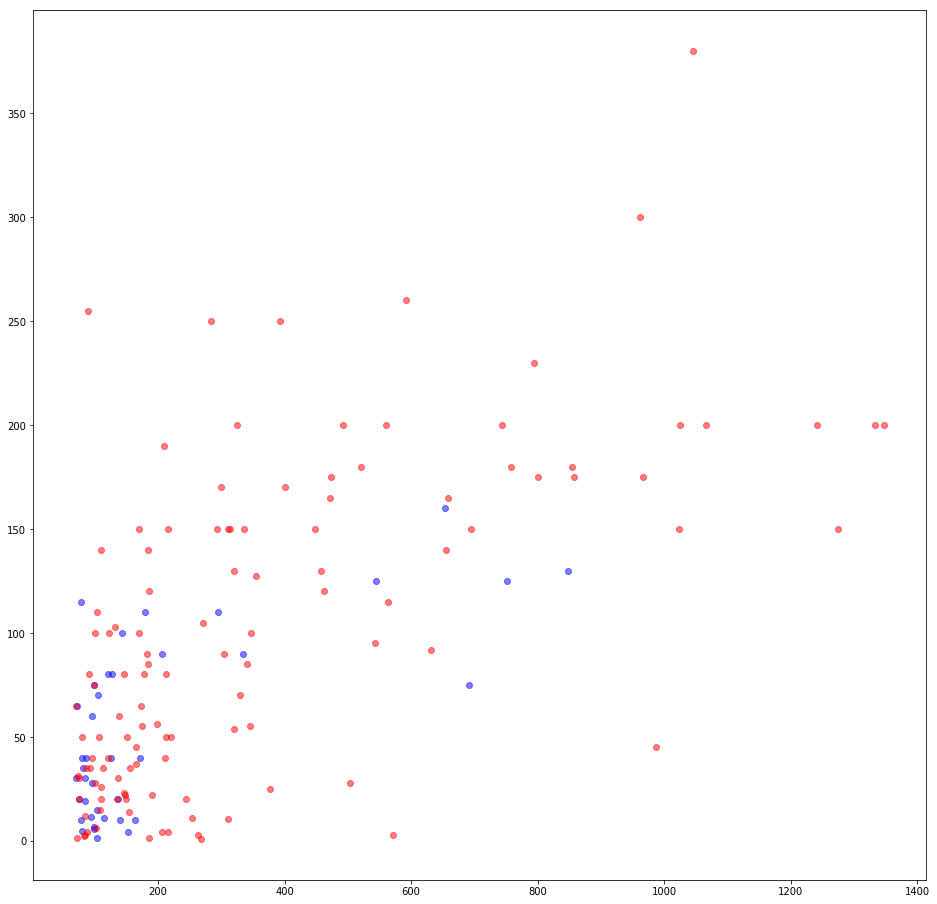

In [629]:
c0 = 'Lionsgate'
x0 = dfx[dfx[c0] == True]['revenue_m']
y0 = dfx[dfx[c0] == True]['budget_m']
z0 = dfx[dfx[c0] == True]['multiple']

c1 = 'disney'
x1 = dfx[dfx[c1] == True]['revenue_m']
y1 = dfx[dfx[c1] == True]['budget_m']
z1 = dfx[dfx[c1] == True]['multiple']

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(111)

ax1.scatter(x0, y0,alpha=0.5, c='blue')
ax1.scatter(x1, y1,alpha=0.5, c='red')
ax.set_xlabel('budget', fontsize=15), ax.set_ylabel('revenue', fontsize=15)
ax.grid(True)

plt.show()